# Macroeconometrics Final Exam 2020
### André Filipe Silva - 26005

--------------------------------------------------------------



[Link to required packages loading](#packages)

## Exercise 1a <a name="1amain"></a>
[Link to appendix](#1a)

> By definition, cointegration requires that the variables are integrated of the same order. The equilibrium theories involving non-stationary variables require the existence of a combination of variables that is stationary. That is the main point of cointegration.

> So, we first need to test for the order of  integration (i.e. number of unit roots) of each series. The ADF test is suitable to infer the number the number of unit roots and thus determine if there can possibly be a cointegrating relationship or not.

>We test to infer the number of unit roots in each series using the Augmented Dickey-Fuller test (ADF). Using the broader version of the test for presentation of what the ADF test is:<br>
$$\triangle y_t = a_0 + \gamma y_{t-1} + a_2t+ \epsilon_t$$<br>

>The test hypothesis are as follows:<br>
$H_0: \gamma = 0 \Rightarrow Non-stationarity$<br>
$H_1: \gamma < 0 \Rightarrow Stationarity$

In [8]:
# USA GDP Series
adf.test(zt[,1],k=2) 


	Augmented Dickey-Fuller Test

data:  zt[, 1]
Dickey-Fuller = -1.986, Lag order = 2, p-value = 0.5801
alternative hypothesis: stationary


> We selected the lag orders, or number of lags, according to the question (2). And for a 5% statistical significance, we do not reject the null hypothesis of non-stationarity.

In [9]:
# USA GDP Series in 1st Differences
adf.test(diff(zt[,1]),k=2)

Warning message in adf.test(diff(zt[, 1]), k = 2):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(zt[, 1])
Dickey-Fuller = -4.6262, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


> In first differences, the USA GDP series is stationary. That means the USA GDP Series has one unit root - it is integrated of order 1, I(1).

In [11]:
#GER GDP Series
adf.test(zt[,2], k=2)


	Augmented Dickey-Fuller Test

data:  zt[, 2]
Dickey-Fuller = -0.89617, Lag order = 2, p-value = 0.946
alternative hypothesis: stationary


> Again, this series is not stationary in levels. We will take first differences and see if it becomes stationary.

In [12]:
# GER GDP Series in 1st differences
adf.test(diff(zt[,2]),k=2)

Warning message in adf.test(diff(zt[, 2]), k = 2):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(zt[, 2])
Dickey-Fuller = -4.9495, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


> With a p-value of 0.01, we reject the null hypothesis of non-stationarity, and conclude for stationarity at a 5% significance level. The GER series is also I(1).

In [13]:
# UK GDP Series
adf.test(zt[,3], k=2)


	Augmented Dickey-Fuller Test

data:  zt[, 3]
Dickey-Fuller = -1.9626, Lag order = 2, p-value = 0.5895
alternative hypothesis: stationary


> Not stationary in levels.

In [14]:
# UK GDP Series in 1st differences
adf.test(diff(zt[,3]),k=2) 


	Augmented Dickey-Fuller Test

data:  diff(zt[, 3])
Dickey-Fuller = -3.2025, Lag order = 2, p-value = 0.09649
alternative hypothesis: stationary


> We conclude for stationarity at a 10% significance level. The series is thus deemed to be I(1), as the ones before.

In [15]:
# FR GDP Series
adf.test(zt[,4],k=2)


	Augmented Dickey-Fuller Test

data:  zt[, 4]
Dickey-Fuller = -1.8377, Lag order = 2, p-value = 0.6397
alternative hypothesis: stationary


> Not stationary in levels.

In [16]:
# FR GDP Series in 1st differences
adf.test(diff(zt[,4]),k=2)


	Augmented Dickey-Fuller Test

data:  diff(zt[, 4])
Dickey-Fuller = -3.6103, Lag order = 2, p-value = 0.04081
alternative hypothesis: stationary


> Stationary. So, the series is I(1).

> At a 10% significance level, all the series are I(1). Given this, it is possible that the series are cointegrated. In the Appendix you can find a plot of the series for some graphic support of this possible cointegrating relationship.

> Now, we will resort to the Johansen methodology to test for cointegration of these series. The main idea of the Johansen test for cointegration is to explore how the engenvalues of $pi$ are related to the rank of $pi$. The number of independent cointegrating vectors of $pi$ can be checked by the number of significant eigenvalues. This test methodology is calculated resorting to MLE.

> $$\triangle x_t = \pi x_{t-1} + \sum_{i=1}^{p-1} \pi_i \triangle x_{t-i} + \epsilon_t$$

>Two statistics allow us to test for cointegration.<br>
> $$\lambda_{trace} (r) = -T + \sum{i=r+1}^{n} ln(1-\hat{\lambda_i})$$<br>
> $$\lambda_{max} (r+1) = -T ln (1-\hat{\lambda}_{r+1})$$

> The first statistic, also known as "trace test" gives the maximum number of distinct cointegrations vectors.
> The second statistic, also known as "eigenvalue test" gives us a precise number of cointegrating vectors. They are both commonly used together for robustness.

> Usually, the first step of the Johanssen methodology would be to select the VAR lag using the undifferenced data. However, the question specifically points us to 2 lags, so we skip that step and go straight to estimating the model and determining the rank of $\pi$. 

In [17]:
# Trace test
vecm1@cval
# Test Statistic values
testvalues1

,10pct,5pct,1pct
r <= 3 |,6.50,8.18,11.65
r <= 2 |,15.66,17.95,23.52
r <= 1 |,28.71,31.52,37.22
r = 0 |,45.23,48.28,55.43


,Test Statistic values
r<=3,2.456095
r<=2,13.474465
r<=1,29.345071
r=0,64.834844


> We reject the null hypothesis of r=0 (no cointegrating vectors) at a 5% significance. Given this, there must be at least one cointegrating relationship. 

In [18]:
# Eigenvalue test
vecm2@cval
# Test Statistic values
testvalues2

,10pct,5pct,1pct
r <= 3 |,6.50,8.18,11.65
r <= 2 |,12.91,14.90,19.19
r <= 1 |,18.90,21.07,25.75
r = 0 |,24.78,27.14,32.14


,Test Statistic values
r<=3,2.456095
r<=2,11.018369
r<=1,15.870607
r=0,35.489773


>We reject the null hypothesis of r=0, but do not reject the null hypothesis of r=1.<br> Thus, we find that there is exactly one cointegrating vector in this relationship.

## Exercise 1b <a name="1bmain"></a>
[Link to appendix](#1b)

> Since all variables are integrated of order 1, and above we have shown that there exists one cointegrating vector, we can use the summary results from the eigenvalue statistic to retrieve the cointegrating vector.

In [20]:
coint

,Cointegrating Vector
USA,1.000000000
GER,0.436967968
UK,-1.014610727
FR,0.005283738


## Exercise 1c <a name="1cmain"></a>
[Link to appendix](#1c)

> To check the stationarity of the cointegrating process, we need to test its residuals for autocorrelation. This is done by first showing the regression for the long-run equation, and extracting its residuals to test for stationarity.<br> The long-run equation is as follows:

$$ USA_t = \beta_1 GER_t + \beta_2 UK_t + \beta_3 FR_t + \epsilon_t$$

In [23]:
adf.test(resids)


	Augmented Dickey-Fuller Test

data:  resids
Dickey-Fuller = -2.3139, Lag order = 3, p-value = 0.4487
alternative hypothesis: stationary


> A very important note should be made here. The p-value displayed should not be taken into acount.<br>We must compare the value of our test statistic against the Engle - Granger critical values. However, tables presented are always for a cointegrating relation with a constant in the cointegrating vector - and we do not have a constant. We will, however, analyse the table with constant as I was not able to find one without a constant.

> The Engle-Granger critical value is, for 10% significance, -3.979. Our test-statistic is -2.3139. <br>
This means that we can not conclude for stationarity of the residuals.<br>
This would imply that there is no cointegration, and points more towards a spurious regression.

## Exercise 1d <a name="1dmain"></a>
[Link to appendix](#1d)

> In order to be able to estimate the Vector Error Correction Model, we will neglect the result found above and assume that the cointegrated process is stationary.

> The VECM model was estimated resorting to the VECM() function, and those estimations can be found in the appendix. Our speed of adjustment coefficients, as well as the IRFs and FEVD estimation procedures are obtained resorting to the vec2var() tool.

> The speed of adjustment coefficients are also a way to check if we have a proper cointegration model. In theory, these coefficients together should guarantee a return to a long-run equilibrium - which means that together they should show a negative response to a positive deviation from the long-run equilibrium.

In [26]:
speed

,Speed of Adjustment Coefficients
USA,-0.13388793
GER,-0.10017801
UK,-0.02963721
FR,-0.11736909


> First, we should note that all of the speed of adjustment coefficents are negative which is a good sign, indicating that the cointegrating relation converges in the long-run.<br> The GDP of all of the countries falls in the short-run when there are positive deviations from the long-run equilibrium. The speed of adjustment coefficients should be interpreted in %, so we can see that we have very fast adjustments to positive shocks above the long-run relation.

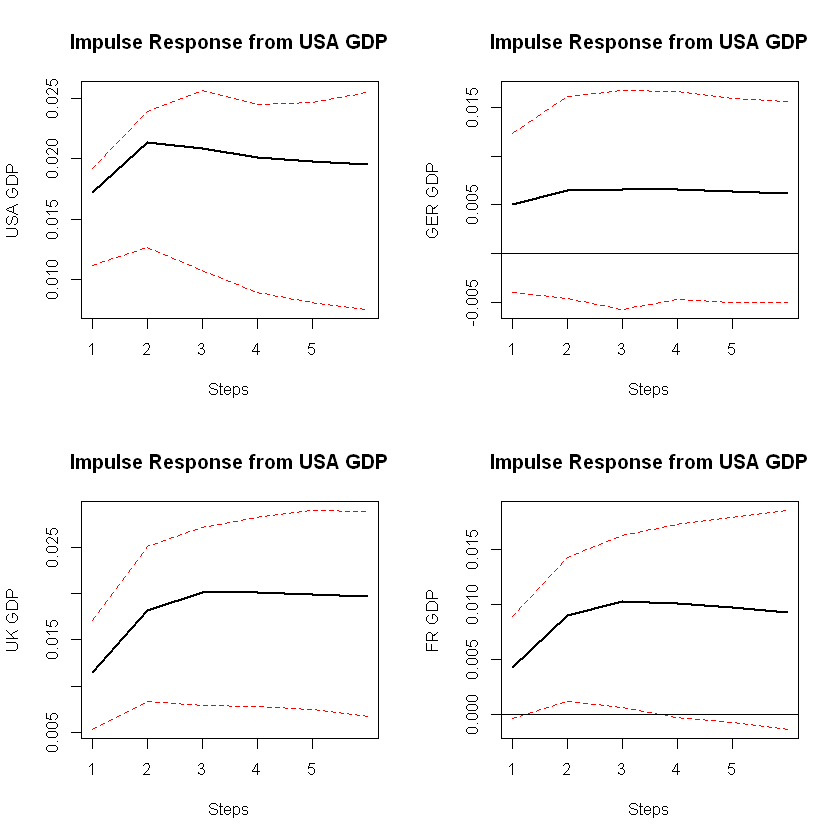

In [27]:
par(mfrow=c(2,2))
stepSize = 1
xMax = 5
numTicks = xMax / stepSize
v1 = c(0:numTicks)*stepSize
plot(irf1$irf$USA[,1], type ='l',lwd=2, main="Impulse Response from USA GDP", ylab="USA GDP", xlab="Steps", xaxt="n", ylim=range(irf1$Lower$USA[,1],irf1$Upper$USA[,1]))
lines(irf1$Upper$USA[,1], lty=2, col="red")
lines(irf1$Lower$USA[,1], lty=2, col="red")
axis(side=1, at=v1, labels=v1)
abline(h=0)
plot(irf1$irf$USA[,2], type ='l',lwd=2, main="Impulse Response from USA GDP", ylab= "GER GDP", xlab="Steps",xaxt="n", ylim=range(irf1$Lower$USA[,2],irf1$Upper$USA[,2]))
lines(irf1$Upper$USA[,2], lty=2, col="red")
lines(irf1$Lower$USA[,2], lty=2, col="red")
axis(side=1, at=v1, labels=v1)
abline(h=0)
plot(irf1$irf$USA[,3], type ='l',lwd=2, main="Impulse Response from USA GDP", ylab= "UK GDP", xlab="Steps",xaxt="n", ylim=range(irf1$Lower$USA[,3],irf1$Upper$USA[,3]))
lines(irf1$Upper$USA[,3], lty=2, col="red")
lines(irf1$Lower$USA[,3], lty=2, col="red")
axis(side=1, at=v1, labels=v1)
abline(h=0)
plot(irf1$irf$USA[,4], type ='l',lwd=2, main="Impulse Response from USA GDP", ylab= "FR GDP", xlab="Steps",xaxt="n", ylim=range(irf1$Lower$USA[,4],irf1$Upper$USA[,4]))
lines(irf1$Upper$USA[,4], lty=2, col="red")
lines(irf1$Lower$USA[,4], lty=2, col="red")
axis(side=1, at=v1, labels=v1)
abline(h=0)

> The IRFs we have are, essentially, for the short-run only - as we have only 5 steps, which is equivalent to saying 5 years. 
> What we see is that a positive shock to USA GDP generates positive increases in all of the countries' GDP in the short run. The response for Germany is not significant at all, but the response for the United Kingdom and France is significant. 

In [28]:
fevd1$USA

USA,GER,UK,FR
1.0000000,0.00000000,0.00000000,0.00000000
0.9150784,0.02211728,0.01739191,0.04541243
0.8485107,0.06860224,0.02483085,0.05805625
0.8119658,0.10010656,0.02839224,0.05953542
0.7888915,0.11985673,0.03231454,0.05893725


> The Forecast Error Variance Decomposition gives us more clues to the reaction. By assumption, the contemporaenous response of other countries' GDP to a positive shock in USA GDP is zero, hence why on the first period we see only zeros for the the GER-UK-FR GDPs.
> I will start by analysing the impact on France's GDP. What we see, is that even as soon as step 5 the impact starts to wane. The reaction is faster in France, which might indicate that the two countries' economies (USA and France) are more bound-together in global trade.
> The reaction in Germany and UK's GDP, although of smaller impact at first, does not show a decreasing impact so fast. I would offer the explanation that perhaps these economies are affected in a less direct way than France's economy, thus implying a "wave-like" effect that reaches these economies in more potential through other countries that at first show a bigger impact.

## Exercise 2a <a name="2amain"></a>
[Link to appendix](#2a)

> Although the transformation code is long I must include it here, as it is the main point of the question.

In [34]:
nrows=nrow(data)
ncols=ncol(data)
i=2:nrows

get_transf= function(data) {
  
  n=2:nrow(data)
  for (j in 2:ncol(data)){
    
    if (data[1,j]==2) {
      data[n,j]=c(0, diff(data[i,j]))
    }
    else if (data[1,j]==3){
      data[n,j]=c(0, diff(data[i,j]))
    }
    else if (data[1,j]==4){
      data[n,j]=log(data[i,j])
    }
    else if (data[1,j]==5){
      data[n,j]=c(0, diff(log(data[i,j])))
    }
    else if (data[1,j]==6){
      data[n,j]=c(0, diff(log(data[i,j])^2))
    }
    else if (data[1,j]==7){
      data[n,j]=c(0,0, diff(data[3:nrows,j]/(data[2:(nrows-1),j]-1)))
    }
  }
  return(data)
}

data1=get_transf(data)
data1=data1[-c(1,2,737,736),]
data1=data1[,-c(1)]

> For the remaining of this exercise, we will assume that the transformations applied already make the series stationary. That is because otherwise we would have to apply HP Filters to each and everyone of the series, and given there are more than 100 series in the data, it is not at all feasible.

## Exercise 2b <a name="2bmain"></a>
[Link to appendix](#2b)

>Principal Component estimation is a smart way to reduce dimensionality and preserving the maximum amount of information possible. This is especially important when we have datasets with many different variables but those variables, in principle, have at least some correlation with each other.

In [40]:
reg1=lm(RPI~pca1$x)
summary(reg1)


Call:
lm(formula = RPI ~ pca1$x)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0464 -0.3025 -0.0567  0.3136  7.8003 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.057492   0.067739  -0.849    0.397    
pca1$xPC1   -0.002299   0.014094  -0.163    0.871    
pca1$xPC2    0.096514   0.017271   5.588 4.79e-08 ***
pca1$xPC3   -0.108925   0.021114  -5.159 4.29e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.14 on 331 degrees of freedom
Multiple R-squared:  0.1542,	Adjusted R-squared:  0.1466 
F-statistic: 20.12 on 3 and 331 DF,  p-value: 5.311e-12


> From the summary above, we can see that the 3 factors explain 15.42% of the variation of Real Person Income (RPI).

In [41]:
reg2=lm(UNRATE ~ pca1$x)
summary(reg2)


Call:
lm(formula = UNRATE ~ pca1$x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.37447 -0.44302  0.00164  0.48120  2.31345 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.076914   0.042667  -1.803 0.072352 .  
pca1$xPC1    0.056061   0.008877   6.315 8.69e-10 ***
pca1$xPC2   -0.037759   0.010878  -3.471 0.000587 ***
pca1$xPC3    0.123597   0.013299   9.293  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7178 on 331 degrees of freedom
Multiple R-squared:  0.3054,	Adjusted R-squared:  0.2991 
F-statistic: 48.52 on 3 and 331 DF,  p-value: < 2.2e-16


>From the summary above, we can see that the 3 factors explain 30.54% of the variation of Real Person Income (RPI).
>I would say this is quite good, considering the enormous dataset we have. It is again proof that Principal Component Analysis is a very useful tool.

## Exercise 2c <a name="2cmain"></a>
[Link to appendix](#2c)

>Although most of the calculations for this exercise are in the Appendix, there is at least one justification necessary.
The variables I declared to be slow moving variables were, in essence, defined according to the BBE FAVAR seminal paper. The criteria applied there to declare variables as slow moving or fast moving was the one I followed when looking at the dataset we have.

> Adding to this, on the class notes, the FAVAR is calculated including 13 VARs. Although through the information criteria (calculations in the Appendix) I would settle for 6 lags, I will use 12 on my FAVAR estimation in order to account for seasonal behavior.

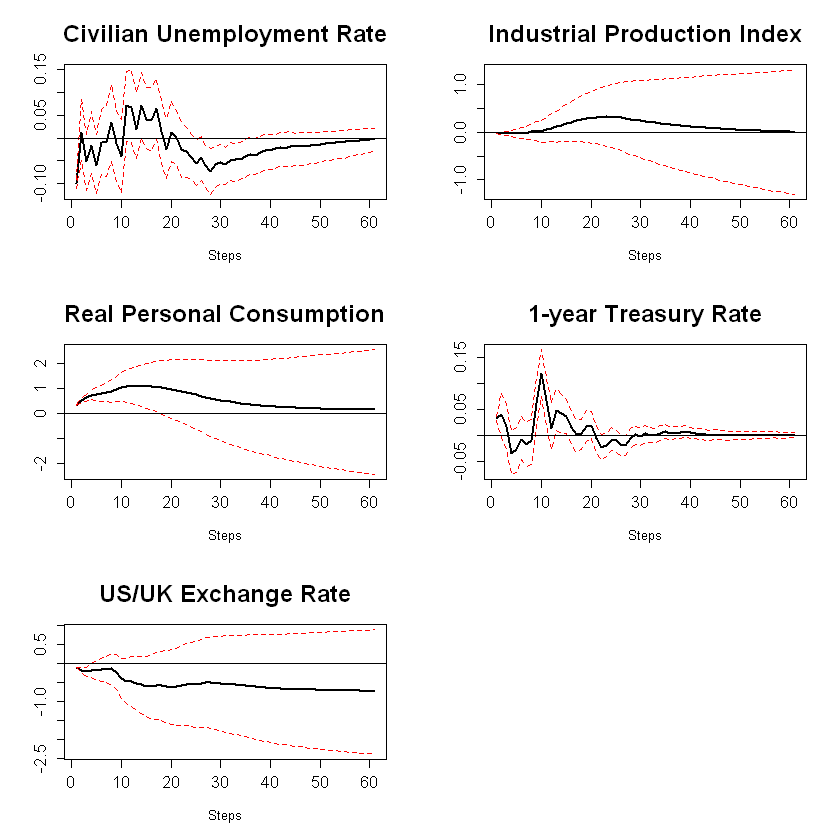

In [50]:
par(mfrow=c(3,2))
for(i in variables){
  index = which(variables == i)
  if(transf_code[index] == 5){
    plot(cumsum(IRF[,i]), type ='l',lwd=2, main = variable_names[index],
         ylab= "", xlab="Steps", ylim=range(cumsum(Lower[,i]),cumsum(Upper[,i])),
         cex.main=1.8, cex.axis=1.3)
    lines(cumsum(Upper[,i]), lty=2, col="red")
    lines(cumsum(Lower[,i]), lty=2, col="red")
    abline(h=0)
  }
  else{
    plot(IRF[,i], type ='l',lwd=2, main = variable_names[index],
         ylab= "", xlab="Steps", ylim=range((Lower[,i]),(Upper[,i])),
         cex.main=1.8, cex.axis=1.3)
    lines((Upper[,i]), lty=2, col="red")
    lines((Lower[,i]), lty=2, col="red")
    abline(h=0)  
  }
}

> There are some very interesting results for a few variables. First of all, we can see a big reaction of the Unemployment Rate to a positive shock in FEDFUNDS. The reaction in the short-term is very chaotic, but in the long-run we can see at least some significance in the drop of unemployment. Bear in mind however, that although we can see impact of the shock, it does not exactly match economic theory - a bump in the FED interest rate would, ceteris paribus, increase unemployment.

> The 1-year treasury rate is also highly impacted by the FEDFUNDS shock, as we can see from the volatile response function. 

> The other variables chosen for analysis, however, seem to point towards some irrelevance of its behavior in respect to FEDFUNDS shocks.

## Exercise 2d <a name="2dmain"></a>
[Link to appendix](#2d)

In [53]:
forecast_RPI
real_RPI

[1] 17140.07

[1] 17218.78

In [54]:
forecast_UNRATE
real_UNRATE

[1] 3.573685

[1] 3.5

> The FAVAR approach was in part designed to overcome the usual overparameterized VARs, that tend to lead to very poor forecasts. And in fact, what we can see here is a very good forecast from our FAVAR, when compared to the real values of the variables.
> A second problem with VARs, was that analysis was only possible for a small subset of variables that are explicitly included in the VAR. And even though in the FAVAR we only have one observed variable, we are to come to amazingly good forecast of variables not explicitly included in it.

## Exercise 3a <a name="3amain"></a>
[Link to appendix](#3a)

> Although for the most part the the series looks non-stationary, there is a very big structural break related to the COVID-19 pandemic and as such it is hard to say just from the graph (see appendix) if it stationary or not.
Structural breaks, especially as big as this cause bias. So, I will limit the analysis of the series to the Pre-Covid19 data -the threshold for this will be the "bull market" peak.

In [60]:
adf.test(data1)


	Augmented Dickey-Fuller Test

data:  data1
Dickey-Fuller = -2.3255, Lag order = 13, p-value = 0.4405
alternative hypothesis: stationary


>We do not reject the null hypothesis of non-stationarity at a 5% significance level. We have a non-stationary series.

> In fact, given the years and years of upward trending of the Dow Jones Industrial Average, it would be surprising if we found a stationary series. Financial markets, when the data is analysed for a relatively long period (4-5 years) that does not have crisis, tend to keep on rising in value even if just as a byproduct of self-fulfilling expectactions.

## Exercise 3b) <a name="3bmain"></a>
[Link to appendix](#3b)

> Let's take first differences to check if the model becomes stationary like that.

In [67]:
adf.test(diff_data) 

Warning message in adf.test(diff_data):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff_data
Dickey-Fuller = -13.127, Lag order = 13, p-value = 0.01
alternative hypothesis: stationary


> The series is now stationary.

> For estimating an ARMA model, the results from running the AIC (see appendix) are not satisfactory. It returns the warning "possible convergence problem" many times. While the ACF graph seems easy to analyse, the PACF graph looks very tricky and a visual inspection does not return helpful conclusions.<br>
Stemming from this, I will trust the `auto.arima` function the come up with a properly fitted ARMA model, as the usual alternatives are not proving reliable.

In [68]:
arima1

Series: data1 
ARIMA(1,1,1) with drift 

Coefficients:
         ar1      ma1   drift
      0.9558  -0.9761  7.8029
s.e.  0.0188   0.0141  1.7315

sigma^2 estimated as 24704:  log likelihood=-15833.1
AIC=31674.2   AICc=31674.22   BIC=31697.41

> We find an ARMA(1,1) model to be the most appropriate.
We check the model and find no statistically significant autocorrelation in the residuals. Hence, the model is valid and we can proceed.

## Exercise 3c <a name="3cmain"></a>
[Link to appendix](#3c)

> We will check for the existance of heteroskedasticity.

>The regression estimates show us that we find significant autocorrelation for the squared residuals.
Consequently, we can conclude that the process has conditional heteroscedastic variance. - GARCH effects are present, and thus we need to estimate a GARCH model to account for it.

>The appropriate model seems to be a GARCH(2,2). Model robustness checks are presented in the appendix. In specific, I test for autocorrelation in the residuals, and in the squared residuals. Every check looks valid, and thus the GARCH(2,2) model looks robust.

In [74]:
garch@formula

data ~ arma(1, 1) + garch(2, 2)
attr(,"data")
[1] "data = diff_data"
<environment: 0x000000006c541ea8>

## Exercise 3d <a name="3dmain"></a>
[Link to appendix](#3d)

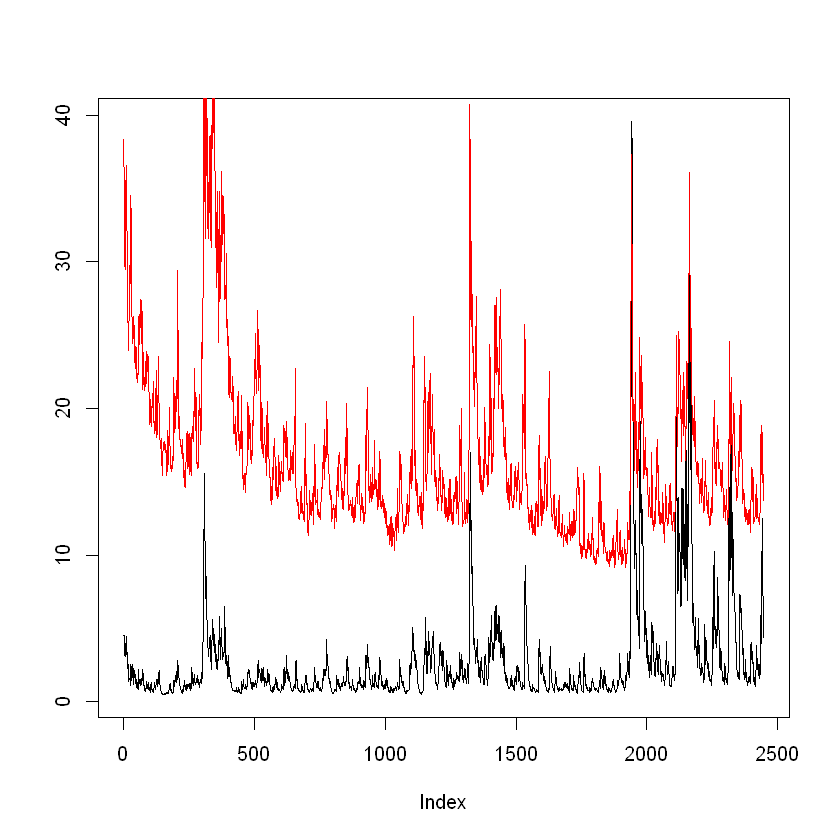

In [82]:
plot(fit$series$h[1:nrow(data2)]/10000, type="l", col="black",ylab=" ")
lines(ts(data2),type="l",col="red")

> Series as large as this are hard to inspect visually. It is easier, to analyse proper matching, to look at the biggest spikes and see if they match together in time. However, with some transformations regarding scale, it is possible to see a close match between the Volatility Index and the GARCH model we estimated. This means that we were properly able to model the heteroskedasticity of the process, which is what GARCH models mainly attempt to do.

## Exercise 4a <a name="4amain"></a>
[Link to appendix](#4a)

In [85]:
adf.test(ptgdp)


	Augmented Dickey-Fuller Test

data:  ptgdp
Dickey-Fuller = -2.5132, Lag order = 4, p-value = 0.364
alternative hypothesis: stationary


> The series are not stationary.

> The HP Filter is a very useful tool to decompose time series into trend and stationary components. With this decomposition, our main aim is to get the cyclical component of our series, clean of the trend that is natural in GDP series.

In [86]:
adf.test(hpgdp$cycle)


	Augmented Dickey-Fuller Test

data:  hpgdp$cycle
Dickey-Fuller = -3.7714, Lag order = 4, p-value = 0.02307
alternative hypothesis: stationary


>At a 5% significance level, the cyclical component of the series is stationary.

## Exercise 4b <a name="4bmain"></a>
[Link to appendix](#4b)

In [88]:
gdp_ts=ts(hpgdp$cycle)

mswitch@Coef

cnst,lag.1,lag.2,lag.3,lag.4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-56.55406,1.2660513,-0.1462665,0.2299915,-0.6537202
49.41695,0.7863584,0.1600372,-0.2590205,0.2373829


The Markov Switching model posits that regime switches are exogenous, as opposed to the usal TAR and STAR models where regime changes are endogenous.

## Exercise 4c <a name="4cmain"></a>
[Link to appendix](#4c)

In [92]:
adf.test(mswitch@model$residuals)

Warning message in adf.test(mswitch@model$residuals):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  mswitch@model$residuals
Dickey-Fuller = -4.346, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


>The test indicates residuals stationarity, pointing towards model adequacy.

>$R^2$ of 0.8934 on first regime and of 0.8624 on second regime. Very good fit.

## Exercise 4d <a name="4dmain"></a>
[Link to appendix](#4d)

> I chose to plot both the smoothed and fitted probabilities. However, if required, graphs with only the smoothed probabilities can be found in the Appendix.

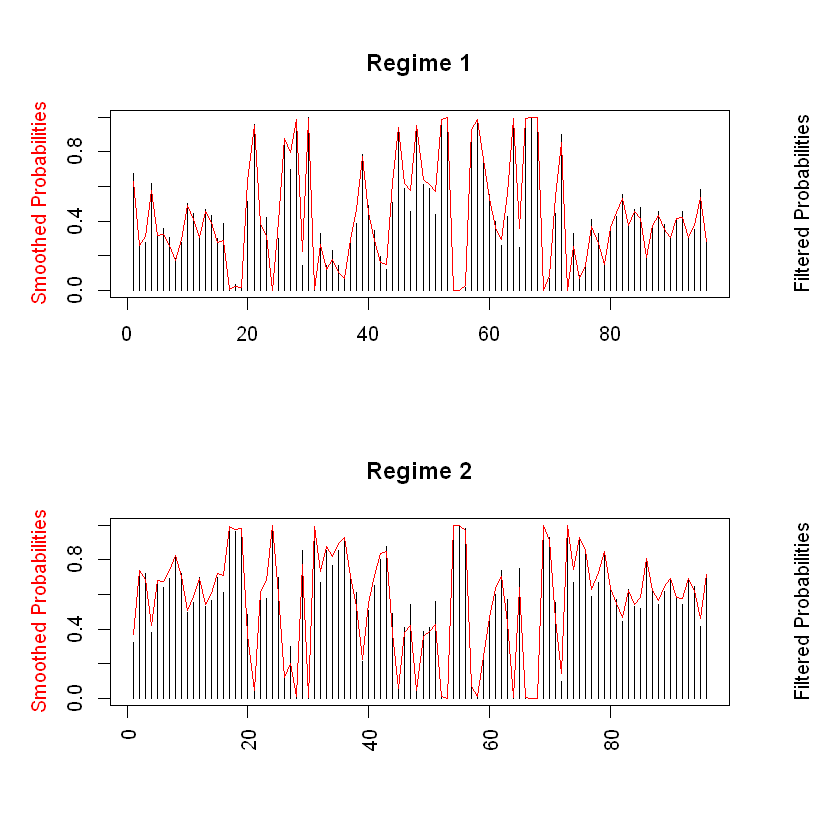

In [95]:
plotProb(mswitch, which=1)

> The smoothed probabilities in this case point towards a very good fit of the data, which lends credibility to the hypothesis of a regime switch. In fact, when comparing the smoothed regime probabilities with the filtered ones, they are close to a perfect fit. From this, I would say that we have a very good smooth transition model (look especially to the end of Regime 1 and beginning of regime 2).

----------------------------------------------------

# Appendix <a name="packages"></a>

In [2]:
library(xlsx)
library(tseries)
library(vars)
library(urca)
library(tsDyn)
library(factoextra)
library(boot)
library(repr)
library(quantmod)
library(fGarch)
library(forecast)
library(dynlm)
library(mFilter)
library(NTS)
library(MSwM)

## Exercise 1a <a name="1a"></a>
[Link to main answer](#1amain)

In [3]:
data=read.xlsx("data_final_2020_Q1.xls", header=TRUE, sheetIndex=1)
data1=data.frame("USA"=data[,2], "GER"=data[,3], "UK"=data[,4], "FR"=data[,5])
zt=log(data1)
zt=ts(zt, start=1960, deltat=1)

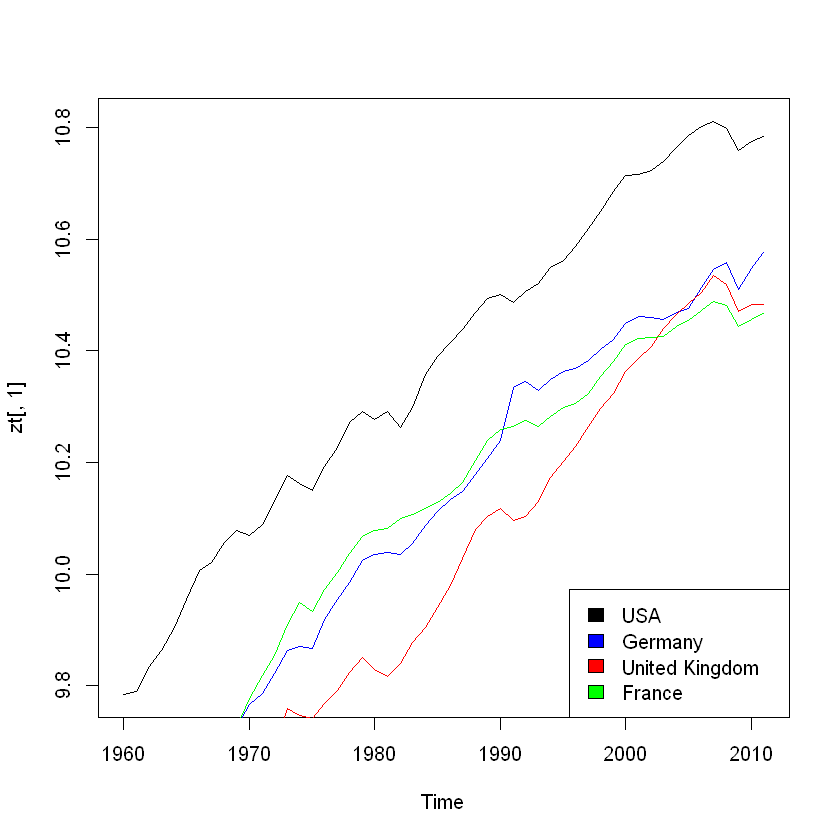

In [4]:
plot(zt[,1])
lines(zt[,2], col="blue")
lines(zt[,3], col="red")
lines(zt[,4],col="green")
legend("bottomright", c("USA","Germany", "United Kingdom", "France"), fill=c("black","blue","red","green"),cex=1)

In [5]:
vecm1=ca.jo(zt, type="trace",ecdet="none",K=2,spec="longrun")
summary(vecm1)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.50825523 0.27196935 0.19777598 0.04793494

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 3 |  2.46  6.50  8.18 11.65
r <= 2 | 13.47 15.66 17.95 23.52
r <= 1 | 29.35 28.71 31.52 37.22
r = 0  | 64.83 45.23 48.28 55.43

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             USA.l2     GER.l2     UK.l2      FR.l2
USA.l2  1.000000000  1.0000000  1.000000  1.0000000
GER.l2  0.436967968 -0.3065273  1.328313  1.0039269
UK.l2  -1.014610727 -0.4776611 -1.267007  0.2005609
FR.l2   0.005283738 -0.1240861 -1.003626 -2.0527199

Weights W:
(This is the loading matrix)

           USA.l2     GER.l2       UK.l2        FR.l2
USA.d -0.13388793 -0.2402984  0.06278952 -0.018899250
GER.d -0.10017801  0.3013174 -0.08677278 -0.025310102
UK.d  -0.02963721  0.1061705  0.1291666

In [6]:
vecm2=ca.jo(zt, type="eigen", ecdet="none", K=2, spec="longrun")
summary(vecm2)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.50825523 0.27196935 0.19777598 0.04793494

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 3 |  2.46  6.50  8.18 11.65
r <= 2 | 11.02 12.91 14.90 19.19
r <= 1 | 15.87 18.90 21.07 25.75
r = 0  | 35.49 24.78 27.14 32.14

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             USA.l2     GER.l2     UK.l2      FR.l2
USA.l2  1.000000000  1.0000000  1.000000  1.0000000
GER.l2  0.436967968 -0.3065273  1.328313  1.0039269
UK.l2  -1.014610727 -0.4776611 -1.267007  0.2005609
FR.l2   0.005283738 -0.1240861 -1.003626 -2.0527199

Weights W:
(This is the loading matrix)

           USA.l2     GER.l2       UK.l2        FR.l2
USA.d -0.13388793 -0.2402984  0.06278952 -0.018899250
GER.d -0.10017801  0.3013174 -0.08677278 -0.025310102
UK.d  -0.0296

In [7]:
testvalues1=matrix(c(vecm1@teststat))
rownames(testvalues1)=c("r<=3","r<=2","r<=1","r=0")
colnames(testvalues1)=c("Test Statistic values")

testvalues2=matrix(c(vecm2@teststat))
rownames(testvalues2)=c("r<=3","r<=2","r<=1","r=0")
colnames(testvalues2)=c("Test Statistic values")

## Exercise 1b <a name="1b"></a>
[Link to main answer](#1bmain)

In [19]:
coint=matrix(c(1.0000000,0.436967968,-1.014610727,0.005283738))
rownames(coint)=c("USA","GER","UK", "FR")
colnames(coint)=c("Cointegrating Vector")

## Exercise 1c <a name="1c"></a>
[Link to main answer](#1cmain)

In [21]:
# Long- run equation 
reg1=lm(zt[,1] ~ 0 + zt[,2] + zt[,3] + zt[,4])
summary(reg1)


Call:
lm(formula = zt[, 1] ~ 0 + zt[, 2] + zt[, 3] + zt[, 4])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06201 -0.03355 -0.01857  0.02003  0.11975 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
zt[, 2] -0.04756    0.23880  -0.199  0.84295    
zt[, 3]  0.56700    0.12841   4.415 5.55e-05 ***
zt[, 4]  0.51504    0.15876   3.244  0.00212 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05316 on 49 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 6.61e+05 on 3 and 49 DF,  p-value: < 2.2e-16


In [22]:
resids = reg1$residuals
resids=resids[1:48]

__Engle-Granger critical values__<br>
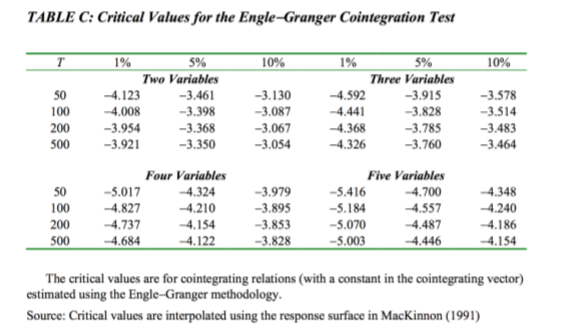

## Exercise 1d <a name="1d"></a>
[Link to main answer](#1dmain)

In [24]:
vecm3=ca.jo(zt, type="eigen", ecdet="none", K=2, spec="longrun")
var1=vec2var(vecm3, r=1)
irf1=irf(var1, n.ahead=5, ci=0.95, runs=100)
fevd1=fevd(var1, n.ahead=5, ci=0.95, runs=100)

In [25]:
# Speed of Adjustment Coefficients
speed=matrix(c(-0.13388793,-0.10017801,-0.02963721,-0.11736909))
rownames(speed)=c("USA","GER","UK","FR")
colnames(speed)=c("Speed of Adjustment Coefficients")

## Exercise 2a <a name="2a"></a>
[Link to main answer](#2amain)

In [32]:
setwd("C:\\Users\\Casa\\OneDrive\\Documentos\\Economia Nova SBE\\1st year\\2º Semestre\\Macroeconometrics\\Final 2020")
data=read.csv("data_final_2020_Q2.csv")

In [33]:
head(data)

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Transform:,5.000,5.0,5.000,5.0,5.00,5.0000,5.0000,5.0000,5.0000,...,6.000,6.00,6.00,6.00,2.0,6.0,6,6,6.0000,1
2,1/1/1959,2437.296,2288.8,17.302,292258.8,18235.77,22.6250,23.4581,22.1904,32.4078,...,11.358,2.13,2.45,2.04,NA,274.9,6476,12298,84.2043,NA
3,2/1/1959,2446.902,2297.0,17.482,294429.5,18369.56,23.0681,23.7747,22.3827,32.6455,...,11.375,2.14,2.46,2.05,NA,276.0,6476,12298,83.5280,NA
4,3/1/1959,2462.689,2314.0,17.647,293425.4,18523.06,23.4004,23.9186,22.4925,32.6455,...,11.395,2.15,2.45,2.07,NA,277.4,6508,12349,81.6405,NA
5,4/1/1959,2478.744,2330.3,17.584,299331.7,18534.47,23.8989,24.2641,22.8221,33.1606,...,11.436,2.16,2.47,2.08,NA,278.1,6620,12484,81.8099,NA
6,5/1/1959,2493.228,2345.8,17.796,301373.0,18679.66,24.2589,24.4655,23.0418,33.3190,...,11.454,2.17,2.48,2.08,95.3,280.1,6753,12646,80.7315,NA


In [35]:
# Run only after running the transformation code in the main answer.
head(data1)

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.0039335065,0.0035762610,0.010349678,7.399916e-03,0.0073098497,0.019395221,0.013406139,0.008628576,0.007307886,0.005234545,...,0.007270734,0.007105061,0.007316708,0.006996540,NA,0.04487386,0.0000000,0.00000000,-0.07143511,NA
4,0.0064311078,0.0073737051,0.009394017,-3.416370e-03,0.0083211993,0.014302405,0.006034409,0.004893581,0.000000000,0.019395726,...,0.008545619,0.007115508,-0.007316708,0.014033007,NA,0.05690003,0.0865394,0.07796211,-0.20176542,NA
5,0.0064981379,0.0070193859,-0.003576400,1.992879e-02,0.0006157120,0.021079317,0.014341493,0.014547444,0.015655403,0.006378126,...,0.017490937,0.007125656,0.014636716,0.007035756,NA,0.02836152,0.2999475,0.20498950,0.01825458,NA
6,0.0058262762,0.0066294805,0.011984315,6.796409e-03,0.0078033950,0.014951128,0.008266070,0.009580593,0.004765381,0.020152090,...,0.007667271,0.007135511,0.007323148,0.000000000,NA,0.08071068,0.3504002,0.24338757,-0.11671163,NA
7,0.0031079972,0.0030221148,0.003645852,-2.693377e-05,0.0090643412,0.001141198,0.007034122,0.007126763,-0.004765381,0.007456232,...,0.017862696,0.000000000,0.014655093,0.007048128,NA,0.07223533,0.5232005,0.41417155,-0.22348292,NA
8,-0.0005855398,-0.0008078403,-0.003364929,1.210440e-02,-0.0003301782,-0.024238762,0.001168234,0.008248018,0.013056494,0.019608680,...,0.017400261,0.000000000,0.007331640,0.000000000,NA,0.04794635,0.4427641,0.39616260,0.03336803,NA


## Exercise 2b <a name="2b"></a>
[Link to main answer](#2bmain)

In [37]:
data2=scale(data1[,1:length(data1)],center=TRUE, scale=TRUE)
data2=data.frame(data2)
pca1=prcomp(na.omit(data2), center=FALSE, scale.=FALSE, rank=3)
data2=na.omit(data2)

In [38]:
summary(pca1)
head(pca1$x)

Importance of first k=3 (out of 128) components:
                          PC1    PC2     PC3
Standard deviation     4.6338 3.6924 3.01323
Proportion of Variance 0.1743 0.1107 0.07371
Cumulative Proportion  0.1743 0.2850 0.35870

,PC1,PC2,PC3
400,0.2318241,-1.410928,-2.4826787
401,0.1523547,-1.835581,-2.3253975
402,0.6271563,-2.685104,-1.1160509
403,0.8041495,-3.569826,0.3586675
404,0.7263182,-2.544822,-1.7854885
405,2.3223020,-1.964157,0.5519283


In [39]:
RPI=data2$RPI
UNRATE=data2$UNRATE

## Exercise 2c <a name="2c"></a>
[Link to main answer](#2cmain)

In [42]:
data3=scale(data2[,1:length(data2)],center=TRUE,scale=TRUE) #Need to rescale because of the deleted NAs

In [43]:
# Step1: Extract principal components of all X

pc_all=prcomp(data3, center=FALSE, scale.=FALSE, rank.=3)
C=pc_all$x
head(C)

,PC1,PC2,PC3
400,-2.1786271,-0.8585782,-3.8753675
401,-0.7789421,-1.1119003,-2.3818593
402,0.0414829,-2.3364614,-1.6735100
403,1.0104324,-3.1280063,-0.9520102
404,0.4673360,-1.9360607,-1.2309123
405,2.3570913,-1.4668453,0.1723091


In [44]:
# Step2: Principal component Extraction of slow variables

slow_vars = c("RPI", "W875RX1", "DPCERA3M086SBEA", "CMRMTSPLx", "RETAILx", "INDPRO", "IPFPNSS", "IPFINAL","IPCONGD", "IPDCONGD", "IPNCONGD", "IPBUSEQ", "IPMAT", "IPDMAT", "IPNMAT", "IPMANSICS", "IPB51222S", "IPFUELS", "CLF16OV", "CE16OV", "UEMPLT5","UEMP5TO14", "UEMP15OV", "UEMP15T26", "UEMP27OV", "CLAIMSx", "PAYEMS", "USGOOD", "CES1021000001","USCONS", "MANEMP", "DMANEMP", "NDMANEMP", "SRVPRD", "USTPU", "USWTRADE", "USTRADE", "USFIRE","USGOVT", "AMDMNOx", "AMDMUOx", "BUSINVx", "M1SL", "M2SL","M2REAL", "TOTRESNS", "BUSLOANS", "REALLN", "NONREVSL","CES0600000008","CES2000000008","CES3000000008", "MZMSL", "DTCOLNVHFNM", "DTCTHFNM", "INVEST", "HWI","HWIURATIO","UNRATE","UEMPMEAN","CES0600000007","AWOTMAN", "AWHMAN","ISRATIOx", "CONSPI")
data_slow=data3[, slow_vars]
pc_slow=prcomp(data_slow, center=FALSE, scale.=FALSE, rank. = 3)
f_slow= pc_slow$x

In [45]:
# Step3: Clean the PC from the effect of observed Y

reg = lm(C ~f_slow + data3[,"FEDFUNDS"])

reg$coefficients

f_hat= C - data.matrix(data3[,"FEDFUNDS"])%*%reg$coefficients[5,]

,PC1,PC2,PC3
(Intercept),-5.610295e-17,-5.734496e-17,3.234456e-17
f_slowPC1,-9.747277e-01,3.231257e-01,-1.715661e-01
f_slowPC2,-8.522602e-02,-2.735062e-01,-2.727462e-01
f_slowPC3,5.424080e-01,8.224088e-01,-2.092199e-01
"data3[, ""FEDFUNDS""]",-5.416431e-01,-2.281351e-01,-7.185073e-01


In [46]:
# Step4: Estimate FAVAR and get IRFs
datavar=data.frame(f_hat, "FEDFUNDS"=data3[,"FEDFUNDS"])
VARselect(datavar)

,1,2,3,4,5,6,7,8,9,10
AIC(n),3.274648,2.922054,2.807153,2.779475,2.726439,2.713954,2.761505,2.796586,2.799438,2.783479
HQ(n),3.367579,3.089330,3.048774,3.095441,3.116749,3.178609,3.300506,3.409931,3.487128,3.545514
SC(n),3.507499,3.341186,3.412565,3.571168,3.704412,3.878208,4.112040,4.333401,4.522534,4.692856
FPE(n),26.434180,18.580466,16.565522,16.116720,15.289404,15.107207,15.853796,16.434698,16.500719,16.262873


In [47]:
var=VAR(datavar, p=12, type="const")

In [48]:
data_var = data.frame(f_hat, "FEDFUNDS" = data3[,"FEDFUNDS"])
var = VAR(data_var, p = 12)

irf_point = irf(var, n.ahead = 60, impulse = "FEDFUNDS", response = "FEDFUNDS", boot = FALSE)

impulse_sd = 0.25/sd(data2$FEDFUNDS)
scale = impulse_sd/(irf_point$irf$FEDFUNDS[1])


# Computing Loading Factors
reg_loadings = lm(data3 ~ f_hat + data3[,"FEDFUNDS"])
loadings = reg_loadings$coefficients



#### BOOTSTRAPING ########


R = 500 # Number of simulations
nvars = 128 # Number of variables
nsteps = 61 # numbers of steps

IRFs = array(c(0,0,0), dim = c(nsteps,nvars,R))

var = lineVar(data_var, lag = 12, include = "const")
for(j in 1:R){    
  data_boot = VAR.boot(var, boot.scheme ="resample")
  var_boot = VAR(data_boot, lag = 12)
  irf1 = irf(var_boot, n.ahead = 60, impulse = "FEDFUNDS", boot = FALSE)
  for(i in 1:nvars){
    IRFs[,i,j] = (irf1$irf$FEDFUNDS %*% matrix(loadings[2:5, i]))*scale
  }
} 

Upper = array(c(0,0), dim = c(nsteps, nvars))
for(k in 1:nsteps){
  for(i in 1:nvars){
    Upper[k,i] = quantile(IRFs[k,i,], probs = c(0.95))[1]
  }
}
Lower = array(c(0,0), dim = c(nsteps, nvars))
for(k in 1:nsteps){
  for(i in 1:nvars){
    Lower[k,i] = quantile(IRFs[k,i,], probs = c(0.05))[1]
  }
}
IRF = array(c(0,0), dim = c(nsteps, nvars))
for(k in 1:nsteps){
  for(i in 1:nvars){
    IRF[k,i] = quantile(IRFs[k,i,], probs = c(0.5))[1]
  }
}

In [49]:
# List of variables I'm interested in: UNRATE, INDPRO, DPCERA3M086SBEA, GS1, EXUSUKx
# Note: The inclusion of "EXCAUSx" was merely a workaround to get my code to work to plot the 5 variables I'm interested in. 
# It is not a variable of interest.

variables = c(grep("^UNRATES$", colnames(data3)), grep("^INDPRO$", colnames(data3)), grep("^DPCERA3M086SBEA$", colnames(data3)),
              grep("^GS1$", colnames(data3)), grep("^EXUSUKx$", colnames(data3)),grep(("^EXCAUSx"), colnames(data3)))

transf_code = c(2, 5, 5, 2, 5, 5)

variable_names = c("Civilian Unemployment Rate", "Industrial Production Index", "Real Personal Consumption",
                   "1-year Treasury Rate", "US/UK Exchange Rate","Workaround code")

## Exercise 2d <a name="2d"></a>
[Link to main answer](#2dmain)

In [51]:
favar=var
pred=predict(favar, n.ahead=1)


loadings2=reg_loadings$coefficients[,c("RPI","UNRATE")]
RPIpredict=loadings2[1,1] + loadings2[2,1]*pred[1]+loadings2[3,1]*pred[2]+loadings2[4,1]*pred[3]+loadings2[5,1]*pred[4]
RPIpredict=RPIpredict*sd(data1[,"RPI"])+mean(data1[,"RPI"])
forecast_RPI=exp(RPIpredict)+data[734,"RPI"]
real_RPI=data[735,"RPI"]

In [52]:
UNRATEpredict=loadings2[1,2] + loadings2[2,2]*pred[1]+loadings2[3,2]*pred[2]+loadings2[4,2]*pred[3]+loadings2[5,2]*pred[4]
UNRATEpredict=UNRATEpredict*sd(data1[,"UNRATE"])+mean(data1[,"UNRATE"])
forecast_UNRATE=UNRATEpredict+data[734,"UNRATE"]
real_UNRATE=data[735,"UNRATE"]

## Exercise 3a <a name="3a"></a>
[Link to main answer](#3amain)

In [56]:
getSymbols("DJIA", src="FRED")
data=window(DJIA, start="2010-05-24", end="2020-05-23")
data=data[!is.na(data[,1])] #Removing NA values

[1] "DJIA"

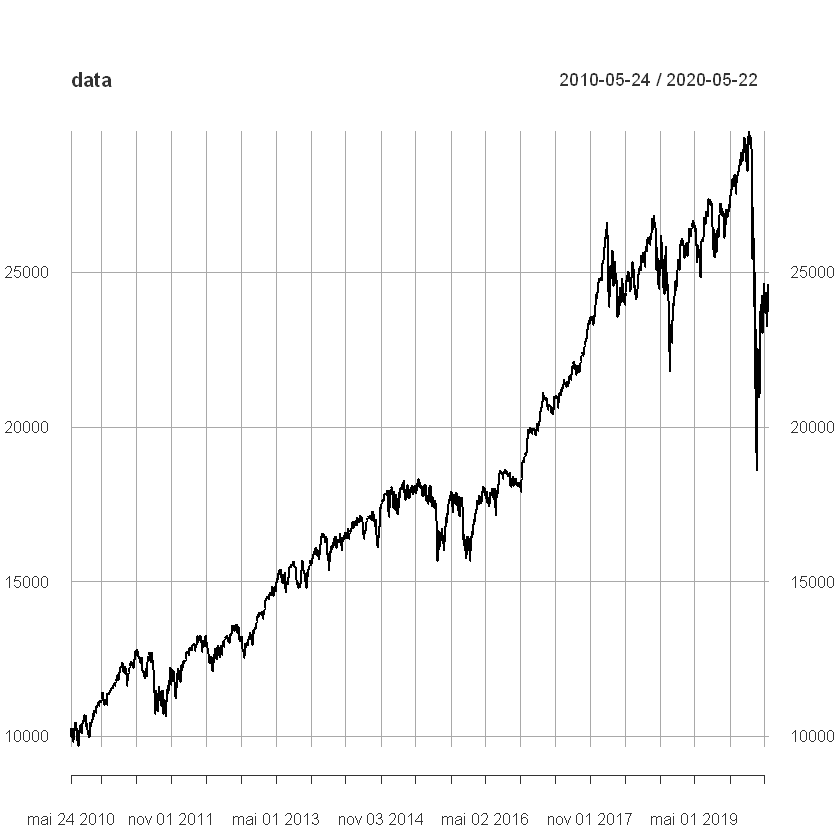

In [57]:
plot(data)

In [58]:
which(data==max(data))
data1=data[1:2446]

[1] 2446

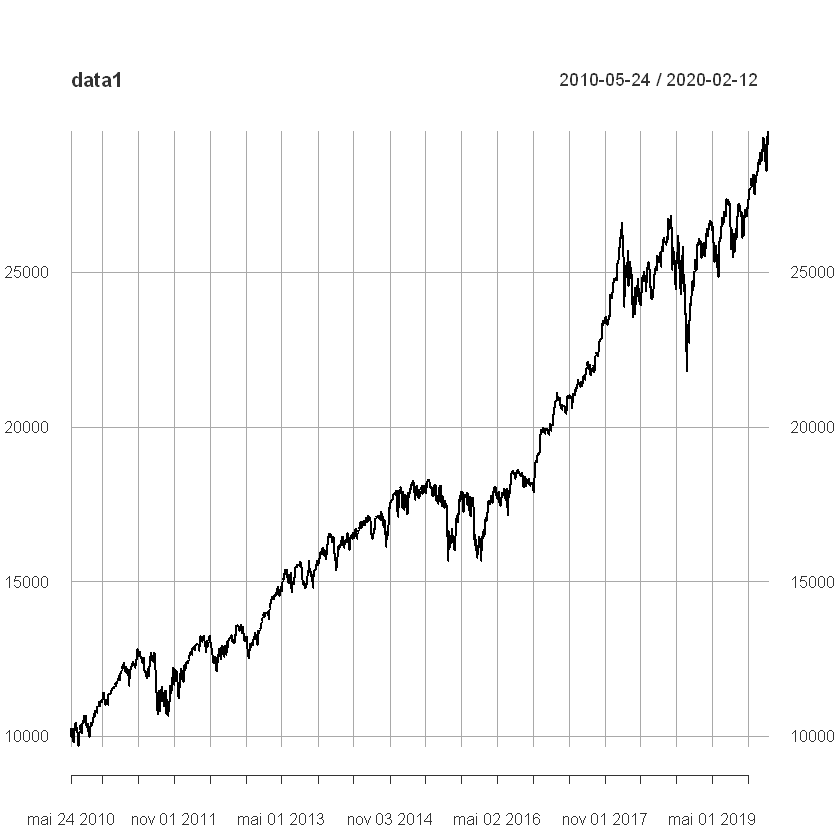

In [59]:
plot(data1, type="l")

## Exercise 3b <a name="3b"></a>
[Link to main answer](#3bmain)

In [61]:
diff_data=diff(data)
diff_data=diff_data[!is.na(diff_data[,1])]

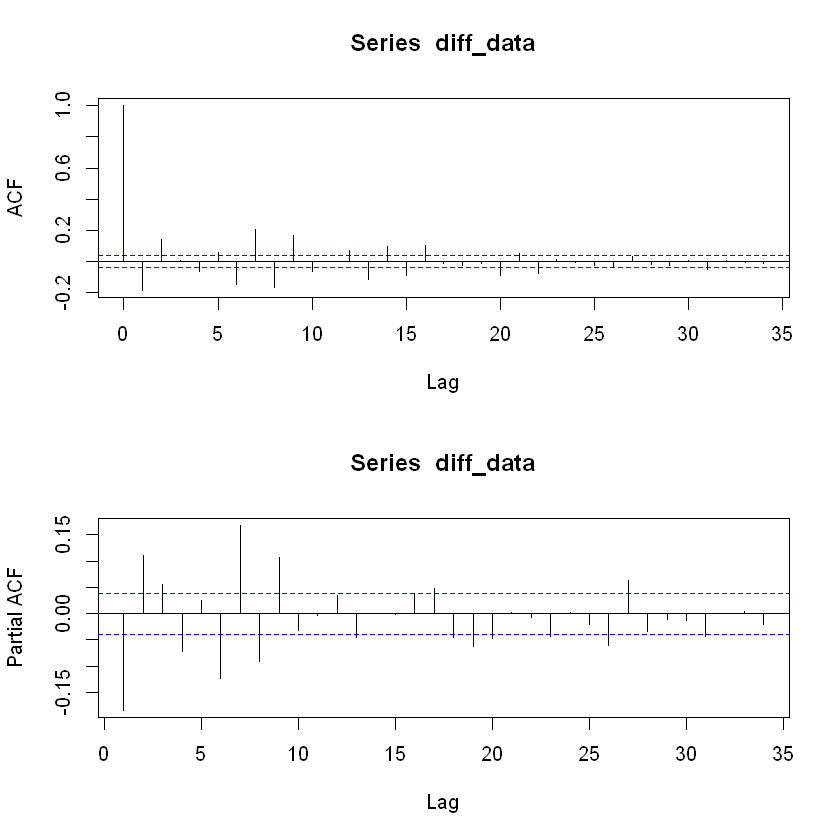

In [62]:
par(mfrow=c(2,1))
acf(diff_data) # Would conclude for MA(0) from this.
pacf(diff_data) # Very hard to analyse graph. 

In [63]:
AIC = matrix(nrow=8, ncol=8,dimnames=list(c(paste("p=",0:7)),(c(paste("q=",0:7)))))

for(i in 1:nrow(AIC)) {
  for(j in 1:ncol(AIC)) {
    AIC[i, j] = arima(diff_data, order=c(i-1,0,j-1))$aic
  }
}

AIC

Warning message in arima(diff_data, order = c(i - 1, 0, j - 1)):
"possible convergence problem: optim gave code = 1"Warning message in arima(diff_data, order = c(i - 1, 0, j - 1)):
"possible convergence problem: optim gave code = 1"Warning message in arima(diff_data, order = c(i - 1, 0, j - 1)):
"possible convergence problem: optim gave code = 1"Warning message in arima(diff_data, order = c(i - 1, 0, j - 1)):
"possible convergence problem: optim gave code = 1"

,q= 0,q= 1,q= 2,q= 3,q= 4,q= 5,q= 6,q= 7
p= 0,34166.74,34099.87,34042.49,34044.46,34041.31,34043.30,34021.91,33974.66
p= 1,34082.03,34068.24,34044.47,34046.49,33979.87,33980.59,33952.35,33932.20
p= 2,34053.13,34051.76,34044.23,34040.66,33913.03,33983.62,33870.47,33872.47
p= 3,34047.34,33957.72,34040.81,34041.96,33913.23,33978.83,33872.46,33873.39
p= 4,34036.27,33951.27,33913.02,33913.58,33896.49,33897.67,33897.86,33873.55
p= 5,34036.62,33946.70,33955.25,33949.37,33897.76,33899.24,33869.92,33874.75
p= 6,33998.83,33903.95,33876.06,33877.71,33878.56,33897.89,33890.91,33870.08
p= 7,33928.55,33887.79,33877.79,33878.01,33878.75,33867.15,33869.22,33867.90


In [64]:
arima1=auto.arima(data1)

In [65]:
Box.test(arima1$residuals)


	Box-Pierce test

data:  arima1$residuals
X-squared = 0.16315, df = 1, p-value = 0.6863


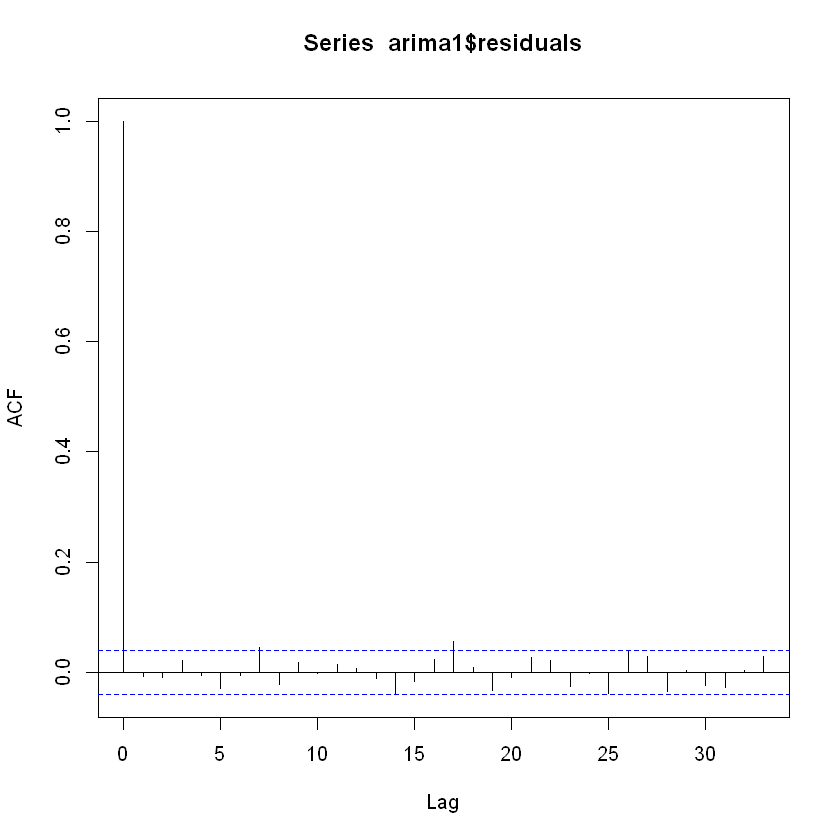

In [66]:
acf(arima1$residuals)

## Exercise 3c <a name="3c"></a>
[Link to main answer](#3cmain)

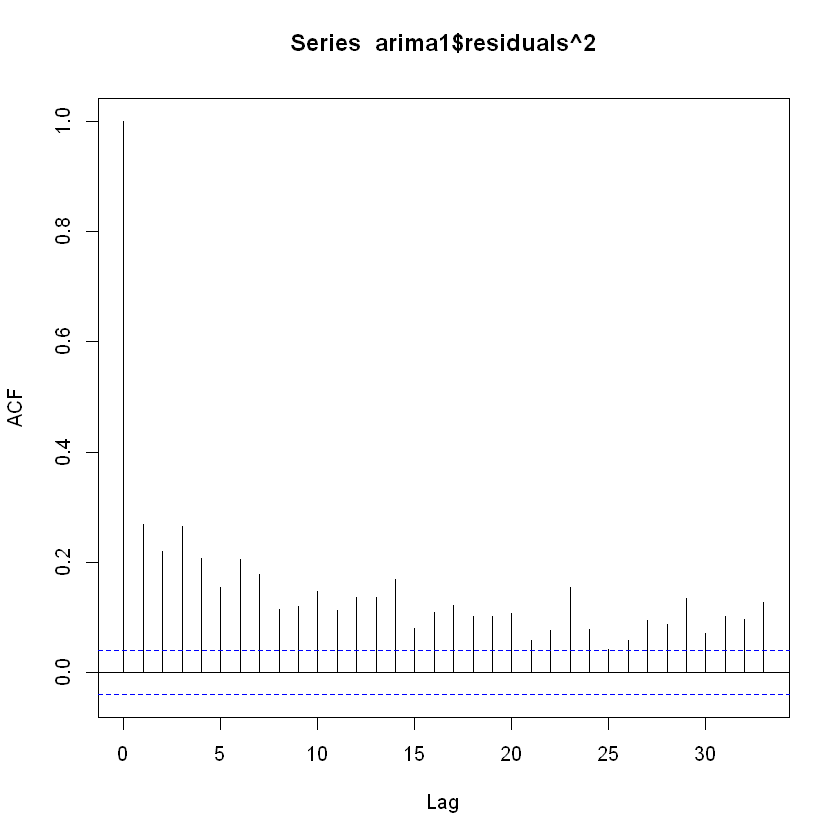

In [69]:
acf(arima1$residuals^2)

In [70]:
Box.test(arima1$residuals^2, lag=2)
Box.test(arima1$residuals^2, lag=5)
Box.test(arima1$residuals^2, lag=10)


	Box-Pierce test

data:  arima1$residuals^2
X-squared = 294.17, df = 2, p-value < 2.2e-16



	Box-Pierce test

data:  arima1$residuals^2
X-squared = 628.86, df = 5, p-value < 2.2e-16



	Box-Pierce test

data:  arima1$residuals^2
X-squared = 931.38, df = 10, p-value < 2.2e-16


In [71]:
AIC = matrix(nrow=7, ncol=8, dimnames=list(c("q=1", "q=2", "q=3", "q=4", "q=5", "q=6", "q=7"), c("p=0", "p=1", "p=2", "p=3", "p=4", "p=5", "p=6", "p=7"))) 

AIC[1,1]= garchFit(~arma(1,1)+garch(1,0), data = diff_data)@fit$ics[1]
AIC[2,1]= garchFit(~arma(1,1)+garch(2,0), data = diff_data)@fit$ics[1] 
AIC[3,1]= garchFit(~arma(1,1)+garch(3,0), data = diff_data)@fit$ics[1] 
AIC[4,1]= garchFit(~arma(1,1)+garch(4,0), data = diff_data)@fit$ics[1] 
AIC[5,1]= garchFit(~arma(1,1)+garch(5,0), data = diff_data)@fit$ics[1] 
AIC[6,1]= garchFit(~arma(1,1)+garch(6,0), data = diff_data)@fit$ics[1] 
AIC[7,1]= garchFit(~arma(1,1)+garch(7,0), data = diff_data)@fit$ics[1] 
AIC[1,2]= garchFit(~arma(1,1)+garch(1,1), data = diff_data)@fit$ics[1] 
AIC[2,2]= garchFit(~arma(1,1)+garch(2,1), data = diff_data)@fit$ics[1] 
AIC[3,2]= garchFit(~arma(1,1)+garch(3,1), data = diff_data)@fit$ics[1] 
AIC[4,2]= garchFit(~arma(1,1)+garch(4,1), data = diff_data)@fit$ics[1] 
AIC[5,2]= garchFit(~arma(1,1)+garch(5,1), data = diff_data)@fit$ics[1] 
AIC[6,2]= garchFit(~arma(1,1)+garch(6,1), data = diff_data)@fit$ics[1] 
AIC[7,2]= garchFit(~arma(1,1)+garch(7,1), data = diff_data)@fit$ics[1] 
AIC[1,3]= garchFit(~arma(1,1)+garch(1,2), data = diff_data)@fit$ics[1] 
AIC[2,3]= garchFit(~arma(1,1)+garch(2,2), data = diff_data)@fit$ics[1] 
AIC[3,3]= garchFit(~arma(1,1)+garch(3,2), data = diff_data)@fit$ics[1] 
AIC[4,3]= garchFit(~arma(1,1)+garch(4,2), data = diff_data)@fit$ics[1] 
AIC[5,3]= garchFit(~arma(1,1)+garch(5,2), data = diff_data)@fit$ics[1] 
AIC[6,3]= garchFit(~arma(1,1)+garch(6,2), data = diff_data)@fit$ics[1] 
AIC[7,3]= garchFit(~arma(1,1)+garch(7,2), data = diff_data)@fit$ics[1] 
AIC[1,4]= garchFit(~arma(1,1)+garch(1,3), data = diff_data)@fit$ics[1] 
AIC[2,4]= garchFit(~arma(1,1)+garch(2,3), data = diff_data)@fit$ics[1] 
AIC[3,4]= garchFit(~arma(1,1)+garch(3,3), data = diff_data)@fit$ics[1] 
AIC[4,4]= garchFit(~arma(1,1)+garch(4,3), data = diff_data)@fit$ics[1] 
AIC[5,4]= garchFit(~arma(1,1)+garch(5,3), data = diff_data)@fit$ics[1] 
AIC[6,4]= garchFit(~arma(1,1)+garch(6,3), data = diff_data)@fit$ics[1] 
AIC[7,4]= garchFit(~arma(1,1)+garch(7,3), data = diff_data)@fit$ics[1] 
AIC[1,5]= garchFit(~arma(1,1)+garch(1,4), data = diff_data)@fit$ics[1] 
AIC[2,5]= garchFit(~arma(1,1)+garch(2,4), data = diff_data)@fit$ics[1] 
AIC[3,5]= garchFit(~arma(1,1)+garch(3,4), data = diff_data)@fit$ics[1] 
AIC[4,5]= garchFit(~arma(1,1)+garch(4,4), data = diff_data)@fit$ics[1] 
AIC[5,5]= garchFit(~arma(1,1)+garch(5,4), data = diff_data)@fit$ics[1] 
AIC[6,5]= garchFit(~arma(1,1)+garch(6,4), data = diff_data)@fit$ics[1]
AIC[7,5]= garchFit(~arma(1,1)+garch(7,4), data = diff_data)@fit$ics[1] 
AIC[1,6]= garchFit(~arma(1,1)+garch(1,5), data = diff_data)@fit$ics[1] 
AIC[2,6]= garchFit(~arma(1,1)+garch(2,5), data = diff_data)@fit$ics[1] 
AIC[3,6]= garchFit(~arma(1,1)+garch(3,5), data = diff_data)@fit$ics[1] 
AIC[4,6]= garchFit(~arma(1,1)+garch(4,5), data = diff_data)@fit$ics[1] 
AIC[5,6]= garchFit(~arma(1,1)+garch(5,5), data = diff_data)@fit$ics[1] 
AIC[6,6]= garchFit(~arma(1,1)+garch(6,5), data = diff_data)@fit$ics[1] 
AIC[7,6]= garchFit(~arma(1,1)+garch(7,5), data = diff_data)@fit$ics[1] 
AIC[1,7]= garchFit(~arma(1,1)+garch(1,6), data = diff_data)@fit$ics[1] 
AIC[2,7]= garchFit(~arma(1,1)+garch(2,6), data = diff_data)@fit$ics[1] 
AIC[3,7]= garchFit(~arma(1,1)+garch(3,6), data = diff_data)@fit$ics[1] 
AIC[4,7]= garchFit(~arma(1,1)+garch(4,6), data = diff_data)@fit$ics[1] 
AIC[5,7]= garchFit(~arma(1,1)+garch(5,6), data = diff_data)@fit$ics[1] 
AIC[6,7]= garchFit(~arma(1,1)+garch(6,6), data = diff_data)@fit$ics[1] 
AIC[7,7]= garchFit(~arma(1,1)+garch(7,6), data = diff_data)@fit$ics[1] 
AIC[1,8]= garchFit(~arma(1,1)+garch(1,7), data = diff_data)@fit$ics[1] 
AIC[2,8]= garchFit(~arma(1,1)+garch(2,7), data = diff_data)@fit$ics[1] 
AIC[3,8]= garchFit(~arma(1,1)+garch(3,7), data = diff_data)@fit$ics[1] 
AIC[4,8]= garchFit(~arma(1,1)+garch(4,7), data = diff_data)@fit$ics[1] 
AIC[5,8]= garchFit(~arma(1,1)+garch(5,7), data = diff_data)@fit$ics[1] 
AIC[6,8]= garchFit(~arma(1,1)+garch(6,7), data = diff_data)@fit$ics[1] 
AIC[7,8]= garchFit(~arma(1,1)+garch(7,7), data = diff_data)@fit$ics[1]


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 0)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               1 0
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(3, 0)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               3 0
 Max GARCH Order:           3
 Maximum Order:             3
 Conditional Dist:          norm
 h.start:                   4
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(5, 0)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               5 0
 Max GARCH Order:           5
 Maximum Order:             5
 Conditional Dist:          norm
 h.start:                   6
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(6, 0)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               6 0
 Max GARCH Order:           6
 Maximum Order:             6
 Conditional Dist:          norm
 h.start:                   7
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(7, 0)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               7 0
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(3, 1)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               3 1
 Max GARCH Order:           3
 Maximum Order:             3
 Conditional Dist:          norm
 h.start:                   4
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(5, 1)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               5 1
 Max GARCH Order:           5
 Maximum Order:             5
 Conditional Dist:          norm
 h.start:                   6
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(6, 1)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               6 1
 Max GARCH Order:           6
 Maximum Order:             6
 Conditional Dist:          norm
 h.start:                   7
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(7, 1)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               7 1
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 2.254553 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 2)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               1 2
 Max GARCH Order:           2
 Maximum Order:             2
 Conditional Dist:          norm
 h.start:                   3
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(3, 2)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               3 2
 Max GARCH Order:           3
 Maximum Order:             3
 Conditional Dist:          norm
 h.start:                   4
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(4, 2)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               4 2
 Max GARCH Order:           4
 Maximum Order:             4
 Conditional Dist:          norm
 h.start:                   5
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(5, 2)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               5 2
 Max GARCH Order:           5
 Maximum Order:             5
 Conditional Dist:          norm
 h.start:                   6
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(6, 2)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               6 2
 Max GARCH Order:           6
 Maximum Order:             6
 Conditional Dist:          norm
 h.start:                   7
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(7, 2)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               7 2
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.957787 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 3)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               1 3
 Max GARCH Order:           3
 Maximum Order:             3
 Conditional Dist:          norm
 h.start:                   4
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(3, 3)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               3 3
 Max GARCH Order:           3
 Maximum Order:             3
 Conditional Dist:          norm
 h.start:                   4
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(4, 3)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               4 3
 Max GARCH Order:           4
 Maximum Order:             4
 Conditional Dist:          norm
 h.start:                   5
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.12937 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(5, 3)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               5 3
 Max GARCH Order:           5
 Maximum Order:             5
 Conditional Dist:          norm
 h.start:                   6
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.000

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.109343 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(6, 3)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               6 3
 Max GARCH Order:           6
 Maximum Order:             6
 Conditional Dist:          norm
 h.start:                   7
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.546991 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(7, 3)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               7 3
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 2.609536 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 4)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               1 4
 Max GARCH Order:           4
 Maximum Order:             4
 Conditional Dist:          norm
 h.start:                   5
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(2, 4)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               2 4
 Max GARCH Order:           4
 Maximum Order:             4
 Conditional Dist:          norm
 h.start:                   5
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 0.6406059 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(3, 4)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               3 4
 Max GARCH Order:           4
 Maximum Order:             4
 Conditional Dist:          norm
 h.start:                   5
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.171842 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(4, 4)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               4 4
 Max GARCH Order:           4
 Maximum Order:             4
 Conditional Dist:          norm
 h.start:                   5
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.234339 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(5, 4)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               5 4
 Max GARCH Order:           5
 Maximum Order:             5
 Conditional Dist:          norm
 h.start:                   6
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.234523 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(6, 4)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               6 4
 Max GARCH Order:           6
 Maximum Order:             6
 Conditional Dist:          norm
 h.start:                   7
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 2.093815 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(7, 4)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               7 4
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 2.609782 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 5)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               1 5
 Max GARCH Order:           5
 Maximum Order:             5
 Conditional Dist:          norm
 h.start:                   6
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 0.8906 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(2, 5)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               2 5
 Max GARCH Order:           5
 Maximum Order:             5
 Conditional Dist:          norm
 h.start:                   6
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(3, 5)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               3 5
 Max GARCH Order:           5
 Maximum Order:             5
 Conditional Dist:          norm
 h.start:                   6
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.281297 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(4, 5)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               4 5
 Max GARCH Order:           5
 Maximum Order:             5
 Conditional Dist:          norm
 h.start:                   6
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.57909 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(5, 5)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               5 5
 Max GARCH Order:           5
 Maximum Order:             5
 Conditional Dist:          norm
 h.start:                   6
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.000

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.500096 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(6, 5)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               6 5
 Max GARCH Order:           6
 Maximum Order:             6
 Conditional Dist:          norm
 h.start:                   7
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 2.750148 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(7, 5)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               7 5
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 2.359506 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 6)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               1 6
 Max GARCH Order:           6
 Maximum Order:             6
 Conditional Dist:          norm
 h.start:                   7
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 0.624984 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(2, 6)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               2 6
 Max GARCH Order:           6
 Maximum Order:             6
 Conditional Dist:          norm
 h.start:                   7
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.234338 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(3, 6)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               3 6
 Max GARCH Order:           6
 Maximum Order:             6
 Conditional Dist:          norm
 h.start:                   7
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.468708 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(4, 6)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               4 6
 Max GARCH Order:           6
 Maximum Order:             6
 Conditional Dist:          norm
 h.start:                   7
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 2.125947 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(5, 6)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               5 6
 Max GARCH Order:           6
 Maximum Order:             6
 Conditional Dist:          norm
 h.start:                   7
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.812446 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(6, 6)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               6 6
 Max GARCH Order:           6
 Maximum Order:             6
 Conditional Dist:          norm
 h.start:                   7
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 3.281581 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(7, 6)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               7 6
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 3.781482 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 7)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               1 7
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 0.7187309 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(2, 7)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               2 7
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 1.124963 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(3, 7)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               3 7
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(4, 7)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               4 7
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(5, 7)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               5 7
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 3.015868 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(6, 7)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               6 7
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.00

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 2.62528 secs

Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(7, 7)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               7 7
 Max GARCH Order:           7
 Maximum Order:             7
 Conditional Dist:          norm
 h.start:                   8
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.000

Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Time to Estimate Parameters:
 Time difference of 3.422107 secs


In [72]:
AIC==min(AIC)

,p=0,p=1,p=2,p=3,p=4,p=5,p=6,p=7
q=1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
q=2,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
q=3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
q=4,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
q=5,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
q=6,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
q=7,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [73]:
garch=garchFit(~arma(1,1)+garch(2,2),data=diff_data)


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 1)
 GARCH Model:               garch
 Formula Variance:          ~ garch(2, 2)
 ARMA Order:                1 1
 Max ARMA Order:            1
 GARCH Order:               2 2
 Max GARCH Order:           2
 Maximum Order:             2
 Conditional Dist:          norm
 h.start:                   3
 llh.start:                 1
 Length of Series:          2515
 Recursion Init:            mci
 Series Scale:              215.521

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.26563931   0.2656393  0.02655089     TRUE
    ar1    -0.99999999   1.0000000 -0.44899375     TRUE
    ma1    -0.99999999   1.0000000  0.26679371     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0

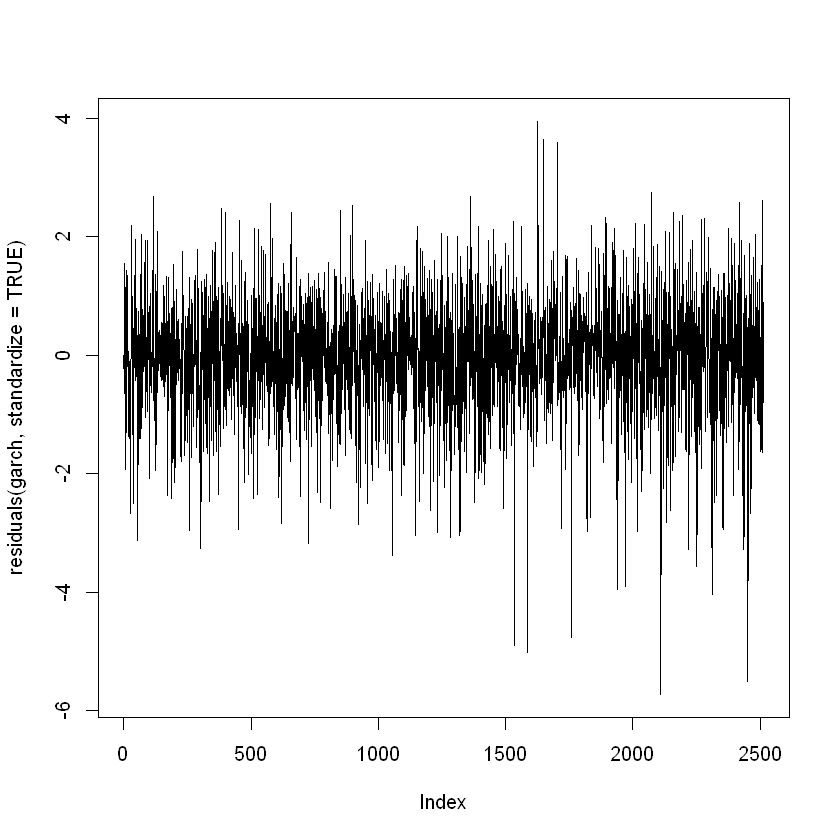

In [75]:
# Model Robustness Checks
plot(residuals(garch, standardize=TRUE),type="l")

In [78]:
Box.test(residuals(garch, standardize=TRUE), lag =15)
Box.test(residuals(garch, standardize=TRUE)^2, lag = 15)


	Box-Pierce test

data:  residuals(garch, standardize = TRUE)
X-squared = 17.373, df = 15, p-value = 0.2971



	Box-Pierce test

data:  residuals(garch, standardize = TRUE)^2
X-squared = 11.08, df = 15, p-value = 0.7469


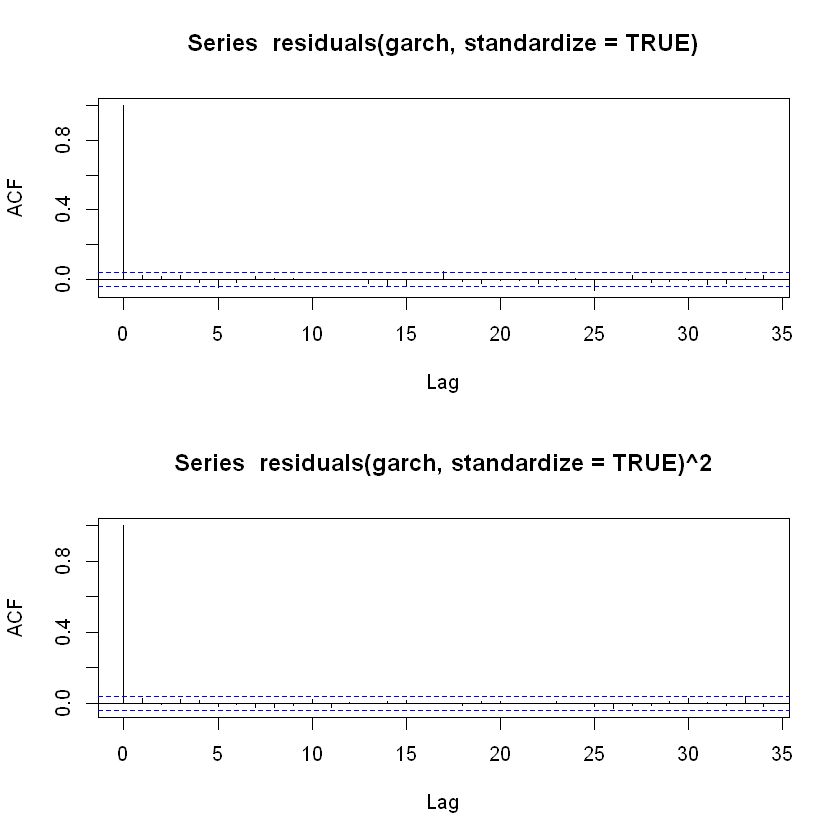

In [80]:
par(mfrow=c(2,1))
acf(residuals(garch, standardize=TRUE))
acf(residuals(garch, standardize=TRUE)^2)

## Exercise 3d <a name="3d"></a>
[Link to main answer](#3dmain)

In [81]:
getSymbols("VIXCLS", src="FRED")
data2=window(VIXCLS, start="2010-05-24", end="2020-02-12")
data2=data2[!is.na(data2)]
fit=attr(garch,"fit")

[1] "VIXCLS"

## Exercise 4a <a name="4a"></a>
[Link to main answer](#4amain)

[1] "CLVMNACSCAB1GQPT"

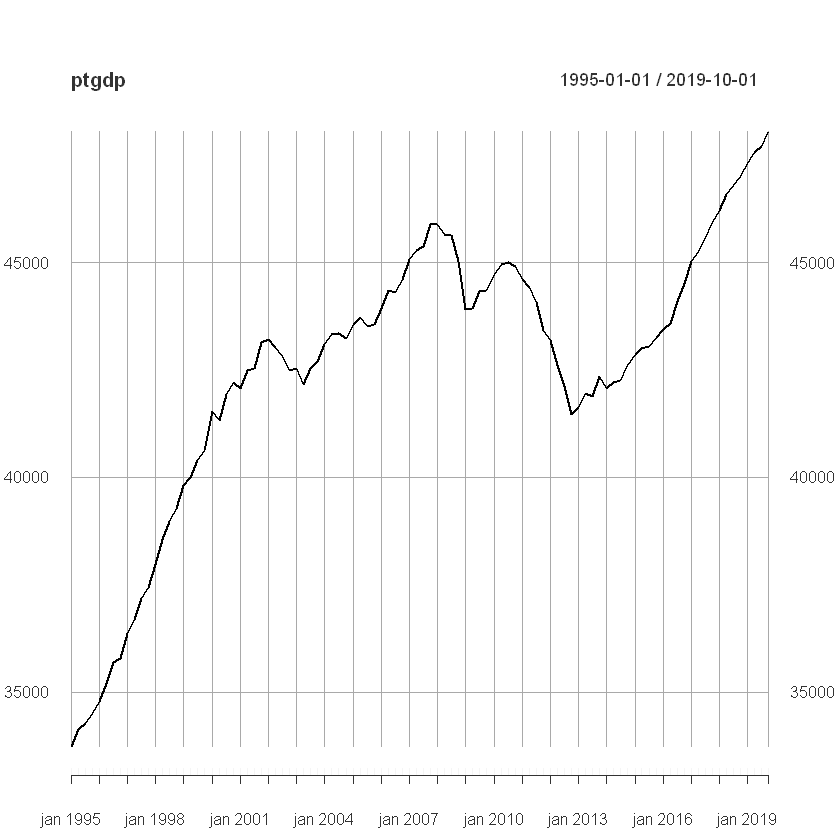

In [83]:
getSymbols("CLVMNACSCAB1GQPT",src="FRED")
ptgdp=CLVMNACSCAB1GQPT
plot(ptgdp)

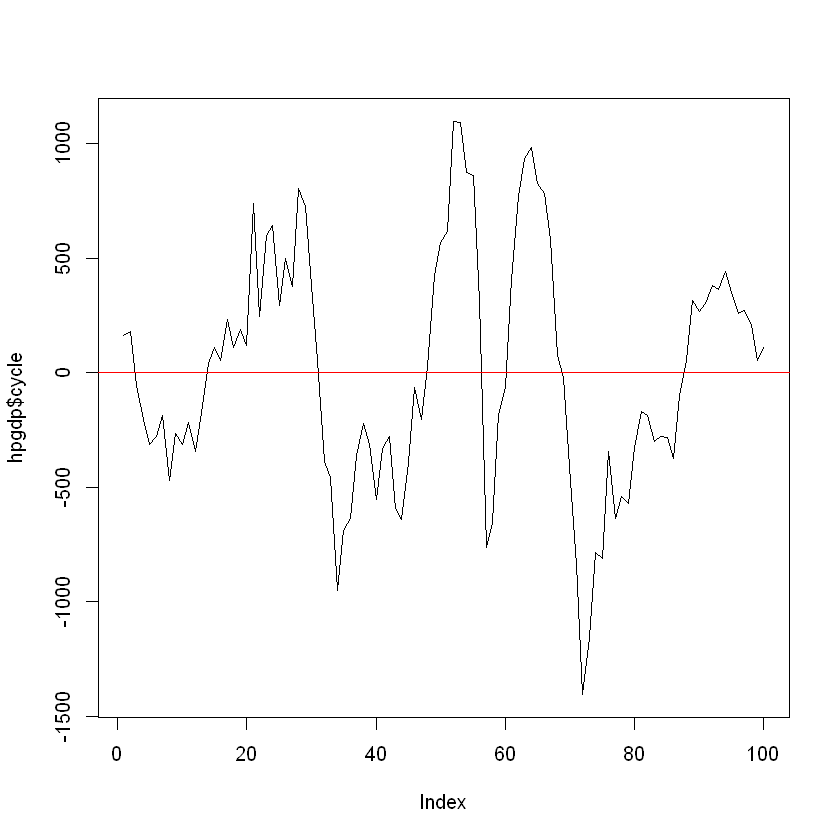

In [84]:
hpgdp=hpfilter(ptgdp, freq=1600, type="lambda")
plot(hpgdp$cycle, type="l")
abline(h=0, col="red")

## Exercise 4b <a name="4b"></a>
[Link to main answer](#4bmain)

In [87]:
gdp_ts=ts(hpgdp$cycle)

mswitch=MSM.fit(gdp_ts,p=4,nregime=2,sw=c(T,T,T,T,T,T))

In [90]:
# Transition Matrix
mswitch@transMat

0.5743731,0.3357127
0.4256269,0.6642873


## Exercise 4c <a name="4c"></a>
[Link to main answer](#4cmain)

In [91]:
summary(mswitch)

Markov Switching Model

Call: msmFit(object = mo, k = nregime, sw = sw)

       AIC     BIC    logLik
  1331.033 1402.32 -655.5163

Coefficients:

Regime 1 
---------
         Estimate Std. Error t value Pr(>|t|)   
cnst(S)  -56.5541    87.4799 -0.6465 0.517956   
lag.1(S)   1.2661     0.4250  2.9791 0.002891 **
lag.2(S)  -0.1463     0.3506 -0.4173 0.676459   
lag.3(S)   0.2300     0.2240  1.0268 0.304515   
lag.4(S)  -0.6537     0.2127 -3.0733 0.002117 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 188.0356
Multiple R-squared: 0.8934

Standardized Residuals:
       Min         Q1        Med         Q3        Max 
-464.71328  -83.90046   11.72651  101.99246  366.76389 

Regime 2 
---------
         Estimate Std. Error t value  Pr(>|t|)    
cnst(S)   49.4169    32.8621  1.5038    0.1326    
lag.1(S)   0.7864     0.1302  6.0399 1.542e-09 ***
lag.2(S)   0.1600     0.1445  1.1073    0.2682    
lag.3(S)  -0.2590     0.1654 -1.5659    0.1174  

## Exercise 4d <a name="4d"></a>
[Link to main answer](#4dmain)

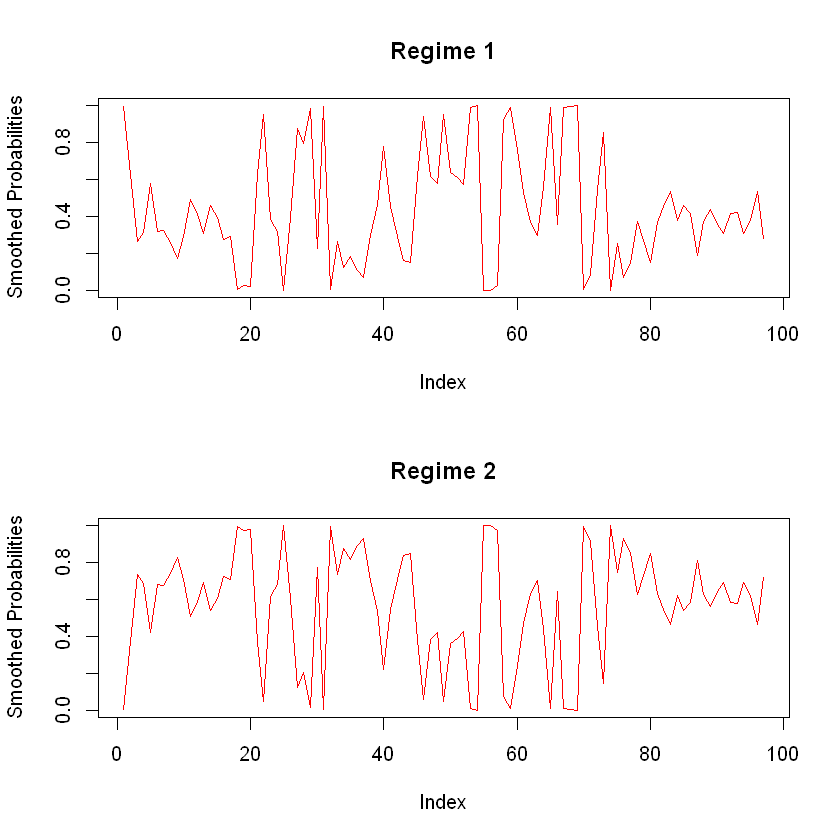

In [94]:
par(mfrow=c(2,1))
plot(mswitch@Fit@smoProb[,1], type="l", col="red", ylab="Smoothed Probabilities", main="Regime 1")
plot(mswitch@Fit@smoProb[,2], type="l", col="red", ylab="Smoothed Probabilities", main="Regime 2")